In [5]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pylab as plt

In [107]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision

import torch

In [ ]:
INPUT_HEIGHT = 160

In [57]:
sample  = '../data/wiki_crop'

In [66]:
def generate_df(data_path):
    path = Path(sample)
    data = [(p, p.parent.name) for p in path.glob("**/*.jpg")]
    
    labels = [d[1] for d in data]
    filenames = [d[0] for d in data]
    data = pd.DataFrame({'image_path' : filenames,'label' : labels,})
    return data

In [68]:

data = generate_df("data/wiki_crop")


In [69]:
data

,image_path,label
0,..\data\wiki_crop\00\10049200_1891-09-16_1958.jpg,00
1,..\data\wiki_crop\00\10110600_1985-09-17_2012.jpg,00
2,..\data\wiki_crop\00\10126400_1964-07-07_2010.jpg,00
3,..\data\wiki_crop\00\1013900_1917-10-15_1960.jpg,00
4,..\data\wiki_crop\00\10166400_1960-03-12_2008.jpg,00
...,...,...
62323,..\data\wiki_crop\99\9799_1960-06-22_2012.jpg,99
62324,..\data\wiki_crop\99\9811999_1953-06-14_2004.jpg,99
62325,..\data\wiki_crop\99\981199_1954-12-30_2006.jpg,99
62326,..\data\wiki_crop\99\9863599_1948-08-13_1963.jpg,99


In [255]:

from PIL import Image
from matplotlib import cm
import json
from PIL import Image
class ImageDataset(Dataset):
    """
    Class that creates dataset for training task
    Arguments: 
    img_dir - directory of all images
    df - dataframe with cleaned dataset
    transform - transform
    """
    def __init__(self, img_dir, df=None, transform=None):
        self.img_dir = img_dir
        self.df = df
        self.transform = transform

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        img_path = self.df["image_path"][idx]
        # print(img_path)
        # image = plt.imread(img_path)
        image = Image.open(img_path)
        
        #image = Image.fromarray((image)*255)
        # image = Image.fromarray(np.uint8((image)*255))
        if image.mode != 'RGB':
            image  = image.convert('RGB')
            # print(np.array(image).shape)
        if self.transform:
            # print('transforming image')
            image = self.transform(image)
            image = image.permute(1, 2, 0)
            # print(image.size())
        target = str(self.df['image_path'][idx])
        return image, target

In [256]:
img_dir = sample

resize = transforms.Resize((INPUT_HEIGHT,INPUT_HEIGHT))
base_transform = transforms.Compose([resize,
        transforms.ToTensor()])

In [257]:
dataset = ImageDataset(img_dir, df = data, transform=base_transform)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)


In [1]:
from load_dataset import generate_dataset
import load_dataset

In [2]:
load_dataset.generate_df(load_dataset.img_dir)

,image_path
0,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
1,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
2,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
3,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
4,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
...,...
6656,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
6657,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
6658,..\data\wiki_crop_filtered_mirrored_pose\wiki_...
6659,..\data\wiki_crop_filtered_mirrored_pose\wiki_...


In [3]:
data, dataset, data_loader = generate_dataset(load_dataset.img_dir) 

In [6]:
load_dataset.img_dir

'data/wiki_crop_filtered_mirrored_pose/wiki_crop_filtered_mirrored_pose'

In [1]:
    data = pd.DataFrame({'image_path': data})
    return data

NameError: name 'Path' is not defined

In [21]:
from pathlib import Path

img_dir = '../data/wiki_crop_filtered_mirrored_pose/wiki_crop_filtered_mirrored_pose'
path = Path(img_dir)
for p in path.glob("*"):
    print(p.name)

10004299_1908-08-19_1950.jpg
10005947_1981-04-07_2006.jpg
10006850_1973-08-17_2010.jpg
100131_1926-09-06_1986.jpg
10013345_1956-05-26_1969.jpg
1001441_1978-06-24_2005.jpg
10017464_1973-08-03_2007.jpg
1002787_1962-01-28_2009.jpg
10033359_1945-06-14_2012.jpg
1003948_1976-03-30_2006.jpg
1004540_1975-08-25_2011.jpg
10047987_1940-05-15_1969.jpg
1005079_1937-09-06_2010.jpg
1005258_1960-01-10_2013.jpg
10055379_1992-09-28_2010.jpg
1006384_1946-12-24_2005.jpg
10071705_1991-07-19_2013.jpg
10071_1961-04-03_2010.jpg
10080646_1986-08-08_2014.jpg
1008506_1974-09-19_2015.jpg
10088281_1945-02-05_1973.jpg
1008840_1938-04-10_1976.jpg
10093237_1964-10-27_2015.jpg
100936_1944-05-25_2012.jpg
1010217_1940-11-23_2009.jpg
10104285_1981-02-26_2013.jpg
1011441_1899-01-21_1940.jpg
101249_1924-12-25_1959.jpg
101393_1967-10-04_2012.jpg
1014986_1972-10-29_2014.jpg
10166400_1960-03-12_2008.jpg
1017_1926-06-03_1979.jpg
1020882_1985-12-03_2009.jpg
1021093_1973-01-17_2008.jpg
1021158_1924-08-16_1968.jpg
1022683_1974-08

In [274]:
img

tensor([[[0.2196, 0.1216, 0.1451],
         [0.2196, 0.1216, 0.1451],
         [0.2196, 0.1216, 0.1451],
         ...,
         [0.2431, 0.2392, 0.2471],
         [0.2510, 0.2431, 0.2549],
         [0.2314, 0.2235, 0.2353]],

        [[0.2235, 0.1294, 0.1529],
         [0.2235, 0.1294, 0.1529],
         [0.2235, 0.1294, 0.1529],
         ...,
         [0.2353, 0.2314, 0.2392],
         [0.2392, 0.2353, 0.2471],
         [0.2275, 0.2235, 0.2314]],

        [[0.2196, 0.1294, 0.1529],
         [0.2196, 0.1294, 0.1529],
         [0.2196, 0.1294, 0.1529],
         ...,
         [0.2667, 0.2667, 0.2745],
         [0.2667, 0.2667, 0.2745],
         [0.2627, 0.2627, 0.2706]],

        ...,

        [[0.4314, 0.3922, 0.4275],
         [0.4314, 0.3922, 0.4275],
         [0.4314, 0.3922, 0.4275],
         ...,
         [0.7176, 0.5529, 0.4314],
         [0.7294, 0.5569, 0.4431],
         [0.7176, 0.5451, 0.4314]],

        [[0.4667, 0.4275, 0.4588],
         [0.4667, 0.4275, 0.4588],
         [0.

In [276]:
data

,image_path,label
0,..\data\wiki_crop\00\10049200_1891-09-16_1958.jpg,00
1,..\data\wiki_crop\00\10110600_1985-09-17_2012.jpg,00
2,..\data\wiki_crop\00\10126400_1964-07-07_2010.jpg,00
3,..\data\wiki_crop\00\1013900_1917-10-15_1960.jpg,00
4,..\data\wiki_crop\00\10166400_1960-03-12_2008.jpg,00
...,...,...
62323,..\data\wiki_crop\99\9799_1960-06-22_2012.jpg,99
62324,..\data\wiki_crop\99\9811999_1953-06-14_2004.jpg,99
62325,..\data\wiki_crop\99\981199_1954-12-30_2006.jpg,99
62326,..\data\wiki_crop\99\9863599_1948-08-13_1963.jpg,99


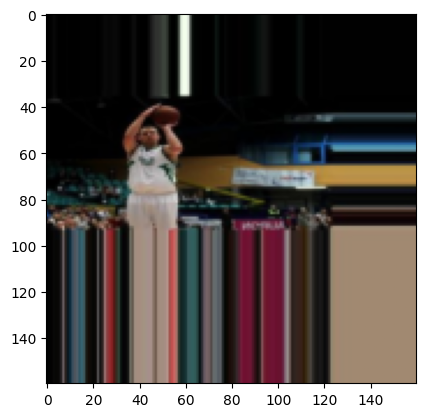

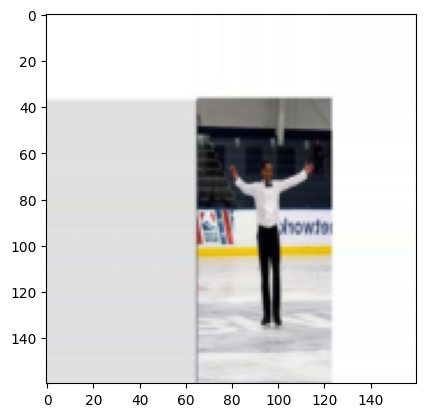

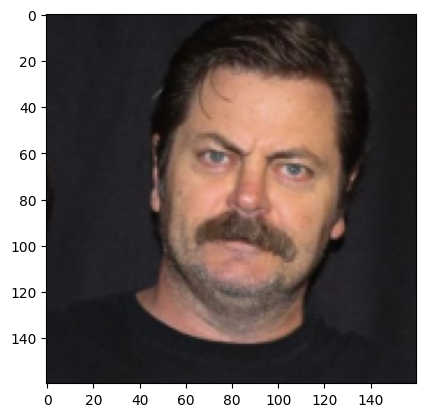

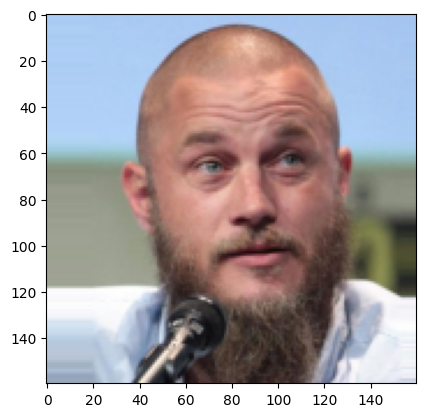

CPU times: total: 781 ms
Wall time: 970 ms


In [6]:
%%time
train_features, target = next(iter(data_loader))
for i in range(4):
    img = train_features[i].squeeze()
    plt.imshow(img)
    plt.show()